In [2]:
using LinearAlgebra
using OrdinaryDiffEq
using Plots

# SIQS Model

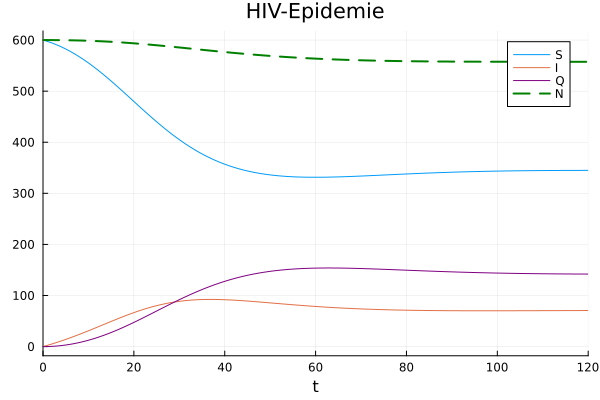

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


3-element Vector{Float64}:
 344.90049952914154
  70.62668593819429
 141.95224747155027

In [3]:
function f(du,u,p,t)
    p, A, α, β, γ, τ, d = p
    du[1] = (1-p) * A - β*u[1]*u[2] - d*u[1] + γ*(u[2]+u[3])    # S'
    du[2] = p * A + β*u[1]*u[2] - (d+γ+α+τ)*u[2]                # I'
    du[3] = -(d+γ+α)*u[3] + τ*u[2]                              # Q'
end

p = 1/10            # Percentage of incoming population infected
A = 25.0            # Population growth rate
α = 1/120           # Rate of death due to illness
β = 1/3000          # Rate of infection per infected
γ = 0.0             # Rate of recovery
τ = 1/10            # Rate of testing
d = 1/24            # Rate of death due to unrelated causes

N0 = 600.0
I0 = 0.0
u0 = [N0 - I0, I0, 0.0]

tspan = (0.0, 120.0)

prob = ODEProblem(f, u0, tspan, (p, A, α, β, γ, τ, d))
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt = plot(title="HIV-Epidemie", legend=:topright)
plot!(plt, sol, vars=(0,1), label="S")
plot!(plt, sol, vars=(0,2), label="I")
plot!(plt, sol, vars=(0,3), label="Q", color=:purple)
plot!(plt, sol.t, map(x -> x[1] + x[2] + x[3], sol.u), label="N", lw=2, ls=:dash, color=:green)

savefig(plt, "../figures/siqs-model.pdf")

display(plt)

sol[end]

# Stability Point

In [4]:
function Q(I)
    return (τ*I) / (d+γ+α)
end

function N(I)
    return (A - α*(I + Q(I))) / d
end

a1 = -β * (α/d + ((α+d)*τ)/(d*(d+γ+α)) + 1)
a2 = (β*A)/d - d - γ - α - τ
I = (-a2 - sqrt(a2^2 - 4*a1*p*A)) / (2*a1)

println("S = ", N(I) - I - Q(I))
println("I = ", I)
println("Q = ", Q(I))
println("N = ", N(I))

S = 344.3760813181156
I = 71.00664407830122
Q = 142.01328815660247
N = 557.3960135530193
